# Evology - demo
This notebook presents a sample of simulation results.

## Table of contents:
* [Mutual funds population size over time](#Mutual-funds-population-size-over-time)
* [Wealth shares of mutual funds investment styles over time](#Wealth-shares-of-mutual-funds-investment-styles-over-time)
* [Mutual fund investment style ownership of a single stock over time](#Mutual-fund-investment-style-ownership-of-a-single-stock-over-time)
* [Quarterly stock prices and returns over time](#Quarterly-stock-prices-and-returns-over-time)
* [Stock trading volume](#Stock-trading-volume)
* [Adaptive fund performance](#Adaptive-fund-performance)
* [Risk-free interest rate and bonds](#Risk-free-interest-rate-and-bonds)
* [Stock fundamentals](#Stock-fundamentals)

In [44]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import trange
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

Evology has two simulation modes:
* "Open loop" initialises the simulation on 2012-06-30 and keeps running over time
* "Quarterly resets" reinitialises the simulation at the end of each quarter, so that the next quarter starts with the most recent data on funds and stocks

We here show some results from the quarterly resets simulation.

In [45]:
# Import simulation data

# Simulation run with quarterly resets
data_qr = pd.read_csv(
    "./data/2023_11_14_reset_run_data.csv",
    index_col=0)
data_qr.head(5)

,Date,Generation,WShare_value,WShare_growth,WShare_core,WShare_income,WShare_index,WShare_quant,WShare_flex,WShare_sector,...,Average_ts_quant_1737,Ownership_share_sector_1737,Cap_share_sector_1737,Average_ts_sector_1737,Ownership_share_adaptive_1737,Cap_share_adaptive_1737,Average_ts_adaptive_1737,Adaptive_diversity,Novelty_0,Wealth_fund_0
0,2011-01-01,-1.0,0.104968,0.180689,0.385453,0.044555,0.099062,0.004577,0.115710,0.064987,...,0.000226,0.017221,0.017221,0.000010,0.0,0.0,0.0,0.0,0.0,1.000000e+06
1,2012-06-30,0.0,0.157130,0.183437,0.446912,0.014065,0.024085,0.023406,0.053199,0.097765,...,0.031099,0.431651,0.431651,0.016840,0.0,0.0,0.0,0.0,0.0,1.000944e+06
2,2012-09-30,1.0,0.152705,0.183493,0.464267,0.011383,0.015831,0.019467,0.049314,0.103539,...,0.033122,0.134794,0.134794,0.004754,0.0,0.0,0.0,0.0,0.0,1.001831e+06
3,2012-12-31,2.0,0.140824,0.234836,0.430348,0.017264,0.015324,0.010619,0.048864,0.101920,...,0.011951,0.369682,0.369682,0.001784,0.0,0.0,0.0,0.0,0.0,1.002747e+06
4,2013-03-31,3.0,0.132430,0.240389,0.425534,0.020512,0.015287,0.011991,0.052735,0.101121,...,0.016842,0.456777,0.456777,0.001764,0.0,0.0,0.0,0.0,0.0,1.001697e+06


In [46]:
# Graphical parameters
fontsize_label = 12
fontsize_legend = 12
fontsize_title = 14

## Mutual funds population size over time

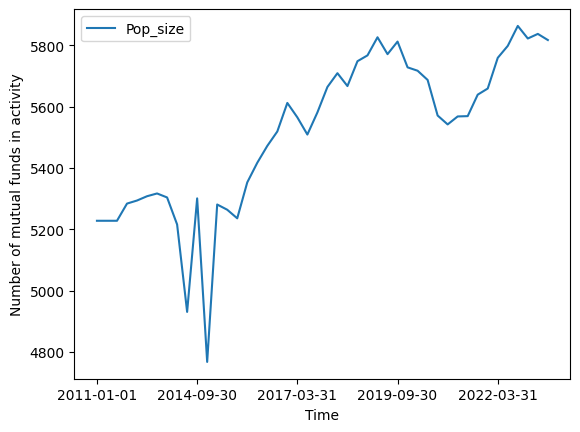

In [47]:
data_qr.plot('Date', 'Pop_size')
plt.xlabel('Time')
plt.ylabel('Number of mutual funds in activity')
plt.show()

## Wealth shares of mutual funds investment styles over time

Investment styles categories are built from grouping various Lipper investment objectives together. This figure describes the relative size of different investment styles among mutual funds during the simulation.

In [48]:
# Define column names, labels and colours

Y_wshares = [
    "WShare_value",
    "WShare_growth",
    "WShare_core",
    "WShare_income",
    "WShare_index",
    "WShare_quant",
    "WShare_flex",
    "WShare_sector"
]

labels_wshares = [
    "Value",
    "Growth",
    "Core",
    "Income",
    "Index",
    "Quantitative",
    "Flexible",
    "Sector"
]

colors_wshares = [
    "blue",
    "red",
    "gold",
    "purple",
    "deepskyblue",
    "pink",
    "orange",
    "limegreen"
]

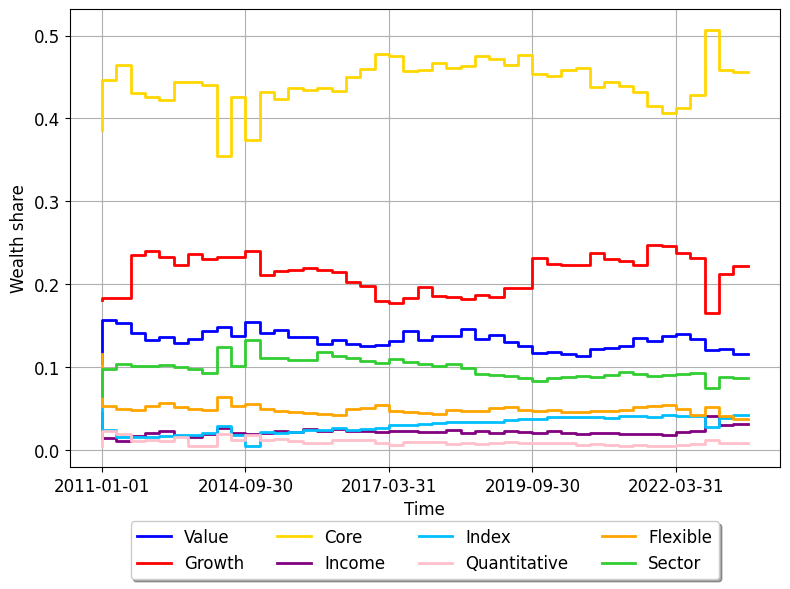

In [49]:
# Show plot

data_qr.plot(x="Date", y=Y_wshares, figsize=(8, 6), drawstyle="steps", color=colors_wshares, lw=2)
plt.xlabel("Time", fontsize=fontsize_label)
plt.ylabel("Wealth share", fontsize=fontsize_label)
plt.xticks(size=fontsize_label)
plt.yticks(size=fontsize_label)
plt.grid()
plt.legend(labels=labels_wshares, fontsize=fontsize_legend, loc='upper center', bbox_to_anchor=(0.5, -0.1),
        fancybox=True, shadow=True, ncol=4)
plt.tight_layout()
plt.show()

## Mutual fund investment style ownership of a single stock over time 

With the same approach, we can decompose each stocks' ownership between the different investment styles.
* Stock #126 (AAPL) shows in the simulation an alternance between the Core and Growth styles, with a progressive growth in the index fund. Technoogy sector funds occasionally take some ownership in the stock.
* Stock #1488 (TSLA) maintains a very high share of growth investors; index gradually accumulates ownerhsip and flexible mutual funds gradually decrease their activity in the stock.
* Stock #82 (AMZN) maintains a high share of growth investors, with occasional value swings and increasing index presence

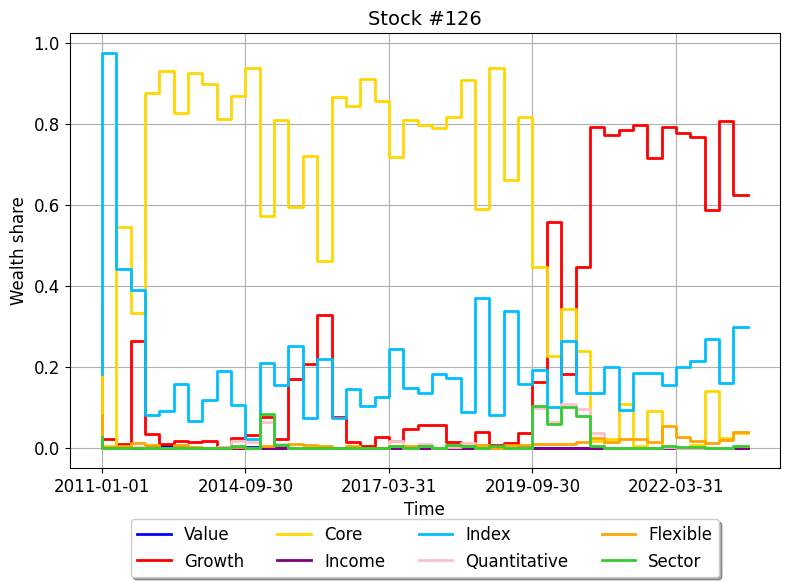

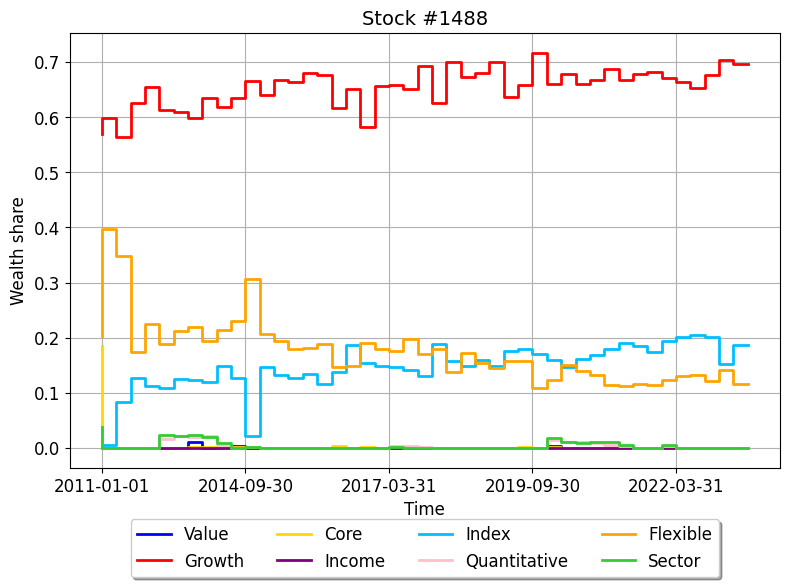

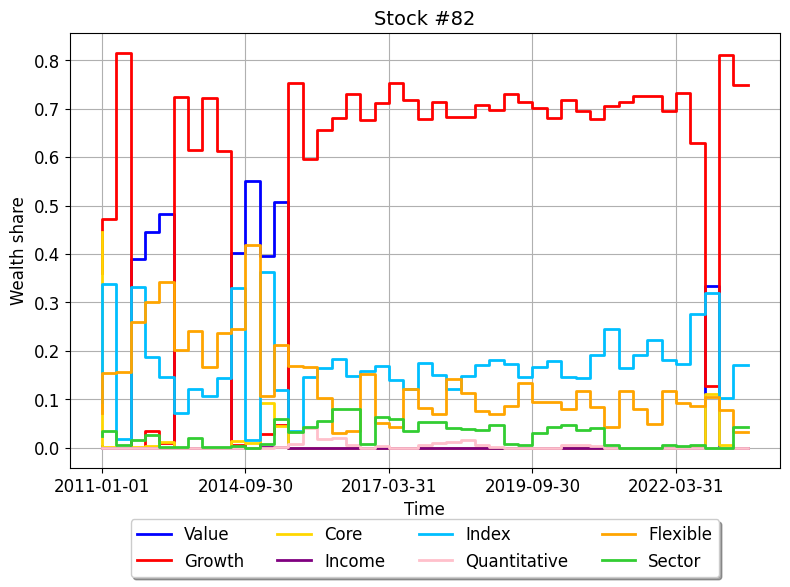

In [50]:
def set_y_wshares_stock(stock_index):
    Y_wshares_stock = [
        "Cap_share_value_{}".format(stock_index),
        "Cap_share_growth_{}".format(stock_index),
        "Cap_share_core_{}".format(stock_index),
        "Cap_share_income_{}".format(stock_index),
        "Cap_share_index_{}".format(stock_index),
        "Cap_share_quant_{}".format(stock_index),
        "Cap_share_flex_{}".format(stock_index),
        "Cap_share_sector_{}".format(stock_index),
    ]
    return Y_wshares_stock

def show_ownership_plot(stock_index):
    # Set relevant columns 
    Y_wshares_stock = set_y_wshares_stock(stock_index)

    # Generate plot
    data_qr.plot(x="Date", y=Y_wshares_stock, figsize=(8, 6), drawstyle="steps", color=colors_wshares, lw=2)
    plt.xlabel("Time", fontsize=fontsize_label)
    plt.ylabel("Wealth share", fontsize=fontsize_label)
    plt.xticks(size=fontsize_label)
    plt.yticks(size=fontsize_label)
    plt.grid()
    plt.title('Stock #{}'.format(stock_index), fontsize=fontsize_title)

    plt.legend(labels=labels_wshares, fontsize=fontsize_legend, loc='upper center', bbox_to_anchor=(0.5, -0.1),
            fancybox=True, shadow=True, ncol=4)
    plt.tight_layout()
    plt.show()

show_ownership_plot(126)
show_ownership_plot(1488)
show_ownership_plot(82)

## Quarterly stock prices and returns over time

Stock prices reflect by market clearing mutual fund demand, strategies and wealth under management. Funds react to announced quarterly fundamentals of the companies.

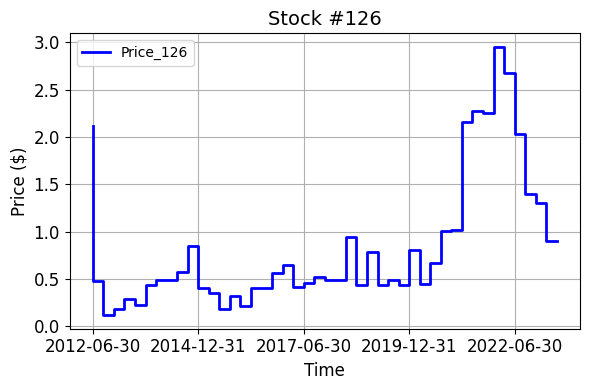

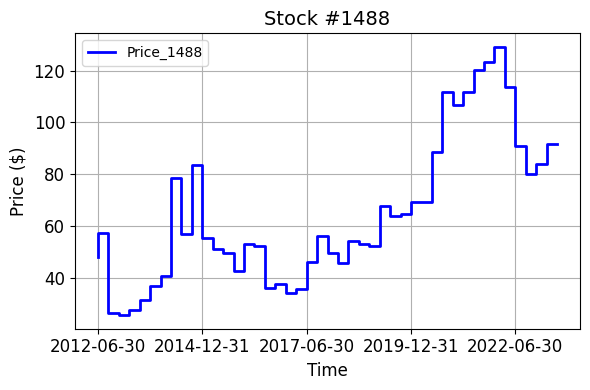

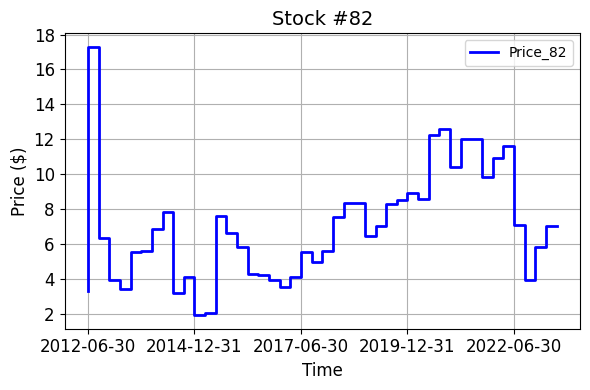

In [51]:
def show_price_plot(stock_index):
    # Generate plot from period 1
    data_qr.iloc[1:].plot(x="Date", y='Price_{}'.format(stock_index), figsize=(6, 4), drawstyle="steps", color='blue', lw=2)
    plt.xlabel("Time", fontsize=fontsize_label)
    plt.ylabel("Price ($)", fontsize=fontsize_label)
    plt.xticks(size=fontsize_label)
    plt.yticks(size=fontsize_label)
    plt.grid()
    plt.title('Stock #{}'.format(stock_index), fontsize=fontsize_title)
    plt.legend()
    plt.tight_layout()
    plt.show()

show_price_plot(126)
show_price_plot(1488)
show_price_plot(82)


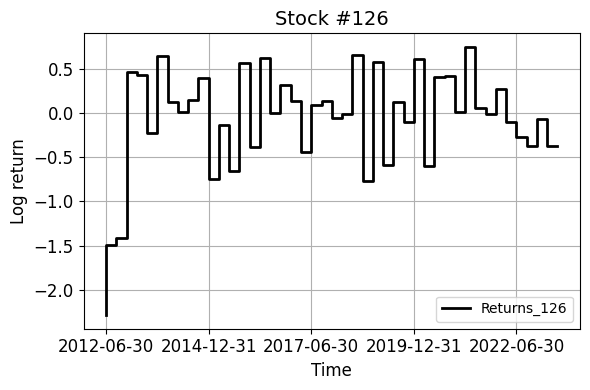

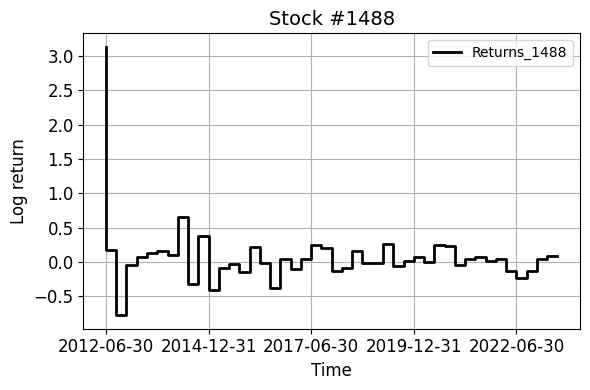

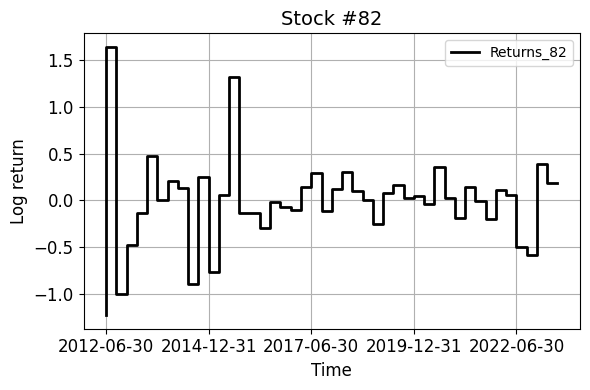

In [52]:
def show_return_plot(stock_index):
    # Generate log returns plot from period 1
    data_qr['Returns_{}'.format(stock_index)] = np.log(data_qr['Price_{}'.format(stock_index)]) - np.log(data_qr['Price_{}'.format(stock_index)].shift(1))
    data_qr.iloc[1:].plot(x="Date", y='Returns_{}'.format(stock_index), figsize=(6, 4), drawstyle="steps", color='black', lw=2)
    plt.xlabel("Time", fontsize=fontsize_label)
    plt.ylabel("Log return", fontsize=fontsize_label)
    plt.xticks(size=fontsize_label)
    plt.yticks(size=fontsize_label)
    plt.grid()
    plt.title('Stock #{}'.format(stock_index), fontsize=fontsize_title)
    plt.tight_layout()
    plt.show()

show_return_plot(126)
show_return_plot(1488)
show_return_plot(82)

100%|██████████| 1738/1738 [00:07<00:00, 239.56it/s]


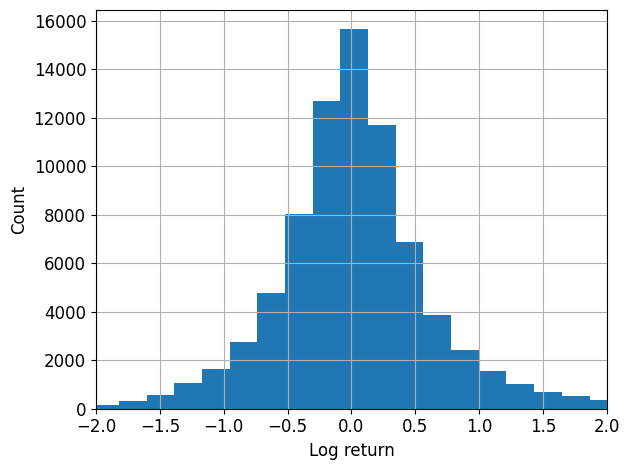

In [53]:
# Show distribution of all stocks quarterly returns

returns = []
for stock_index in trange(1738):
    data_qr['Returns_{}'.format(stock_index)] = np.log(data_qr['Price_{}'.format(stock_index)]) - np.log(data_qr['Price_{}'.format(stock_index)].shift(1))
    returns += data_qr['Returns_{}'.format(stock_index)].tolist()
    
plt.hist(returns, bins=100)
plt.xlabel("Log return", fontsize=fontsize_label)
plt.ylabel("Count", fontsize=fontsize_label)
plt.xticks(size=fontsize_label)
plt.yticks(size=fontsize_label)
plt.xlim(-2,2)
plt.grid()
plt.tight_layout()
plt.show()

## Stock trading volume
As prices, volume is endogeneous; it emerges from the funds' trading strategies and market clearing processes.

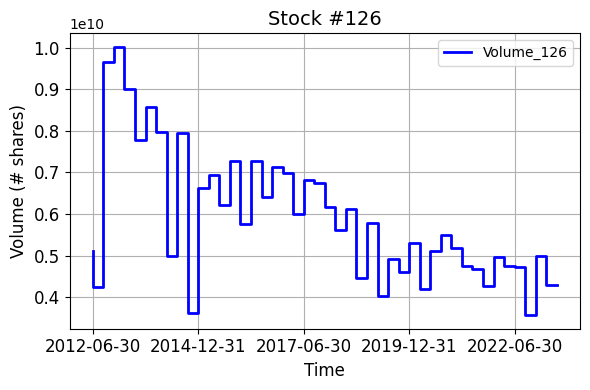

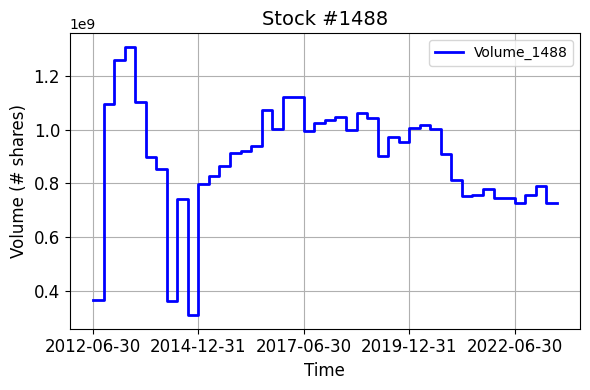

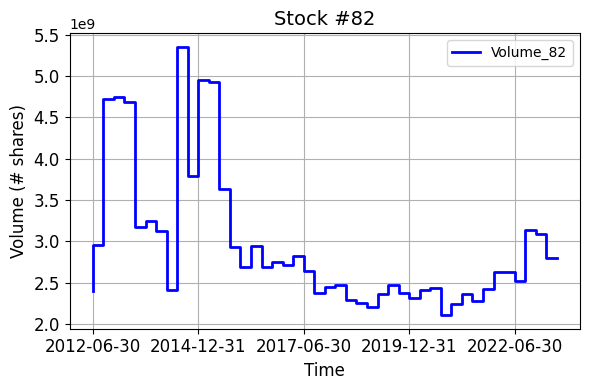

In [54]:
def show_volume_plot(stock_index):
    # Generate volume plot from period 1
    data_qr.iloc[1:].plot(x="Date", y='Volume_{}'.format(stock_index), figsize=(6, 4), drawstyle="steps", color='blue', lw=2)
    plt.xlabel("Time", fontsize=fontsize_label)
    plt.ylabel("Volume (# shares)", fontsize=fontsize_label)
    plt.xticks(size=fontsize_label)
    plt.yticks(size=fontsize_label)
    plt.grid()
    plt.title('Stock #{}'.format(stock_index), fontsize=fontsize_title)
    plt.tight_layout()
    plt.show()

show_volume_plot(126)
show_volume_plot(1488)
show_volume_plot(82)


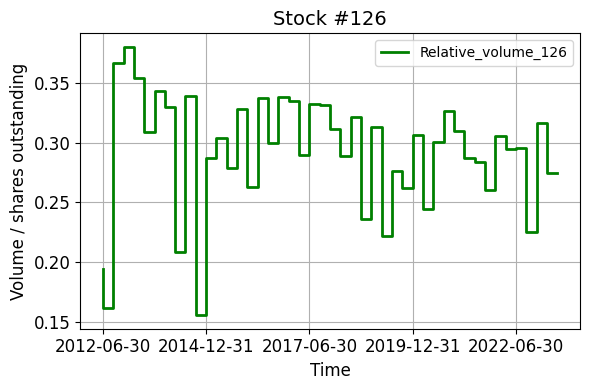

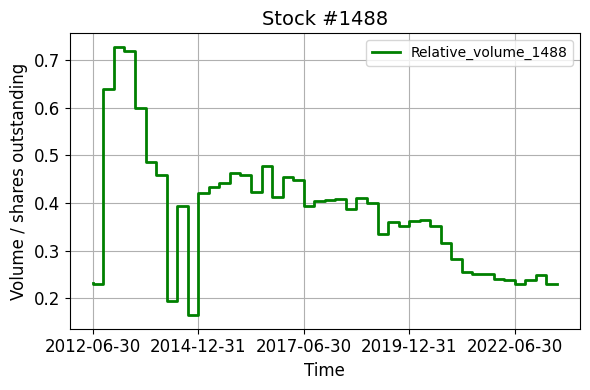

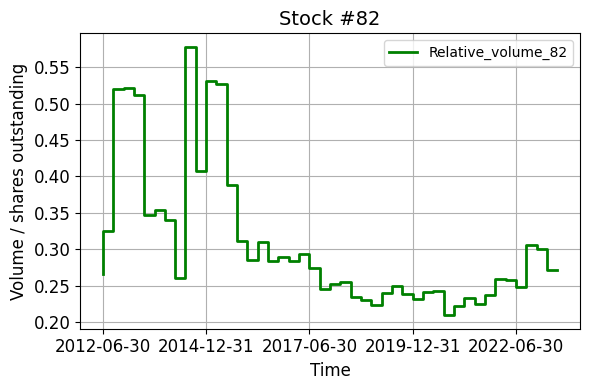

In [55]:
def show_relative_volume_plot(stock_index):
    # Generate percentage of float traded plot from period 1
    data_qr['Relative_volume_{}'.format(stock_index)] =  data_qr['Volume_{}'.format(stock_index)] / data_qr['Shares_outstanding_{}'.format(stock_index)]
    data_qr.iloc[1:].plot(x="Date", y='Relative_volume_{}'.format(stock_index), figsize=(6, 4), drawstyle="steps", color='green', lw=2)
    plt.xlabel("Time", fontsize=fontsize_label)
    plt.ylabel("Volume / shares outstanding", fontsize=fontsize_label)
    plt.xticks(size=fontsize_label)
    plt.yticks(size=fontsize_label)
    plt.grid()
    plt.title('Stock #{}'.format(stock_index), fontsize=fontsize_title)
    plt.tight_layout()
    plt.show()

show_relative_volume_plot(126)
show_relative_volume_plot(1488)
show_relative_volume_plot(82)

## Adaptive fund performance

The model allows to test additional trading strategies: the universe of funds can be supplemented with funds following a user-specified strategy and user-specificed starting capital. This strategy will compete with the existing base strategies.
In this example, an equal-factor strategy gives a static NAV and a decreasing wealth share over time, suggesting that this strategy is weaker than the base strategies.
The ABM can be used in the evaluation module of any machine learning search algorithm to evolve stronger strategies, in this data-driven training environment.

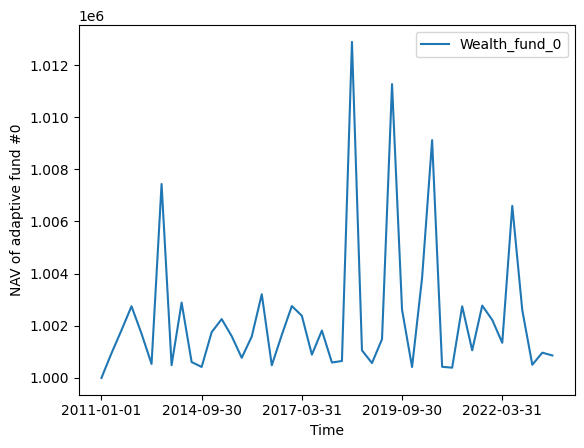

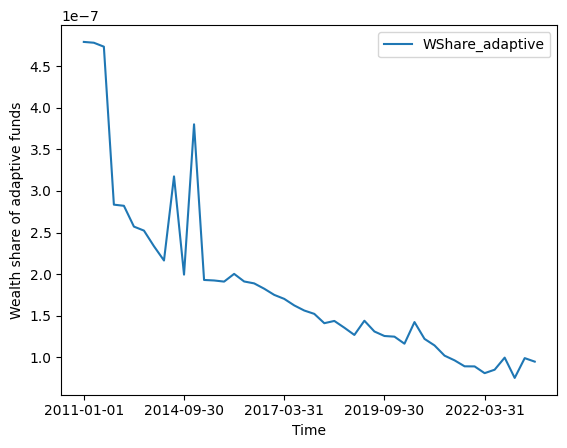

In [56]:
data_qr.plot('Date', 'Wealth_fund_0')
plt.xlabel('Time')
plt.ylabel('NAV of adaptive fund #0')
plt.show()

data_qr.plot('Date', 'WShare_adaptive')
plt.xlabel('Time')
plt.ylabel('Wealth share of adaptive funds')
plt.show()

## Risk-free interest rate and bonds
This model only simulates the equirty asset class. Cash positions receive the risk-free rate, directly imported from historical data.

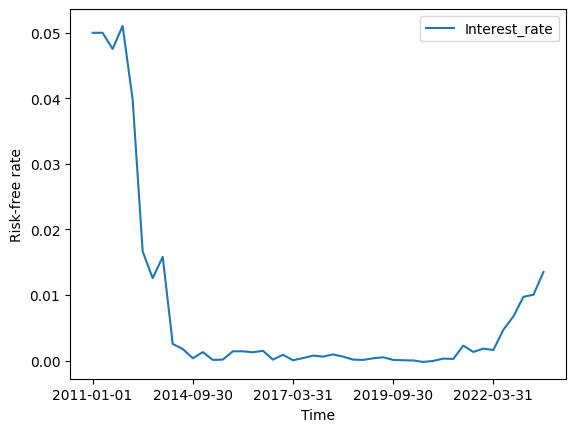

In [57]:
data_qr.plot('Date', 'Interest_rate')
plt.xlabel('Time')
plt.ylabel('Risk-free rate')
plt.show()

## Stock fundamentals
Each stock uses historical fundamentals, such as earnings, dividends, book value, revenue, shares outstanding... These variables are adjusted for stock splits.

For example for AAPL, we can see EPS changing over time and the stock starting to pay a dividend in 2012.
We can also notice the consistent shares buybacks policy, once shares outstanding are adjusted for splits.

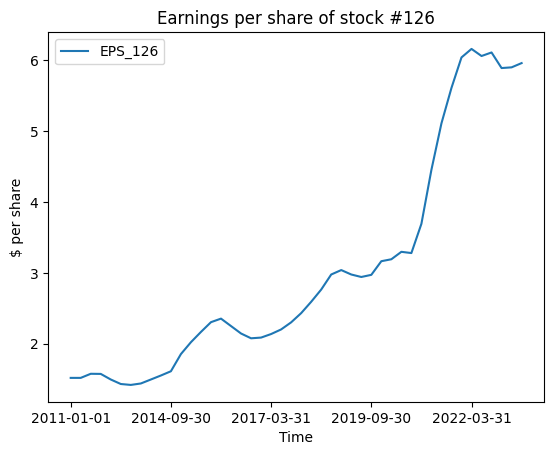

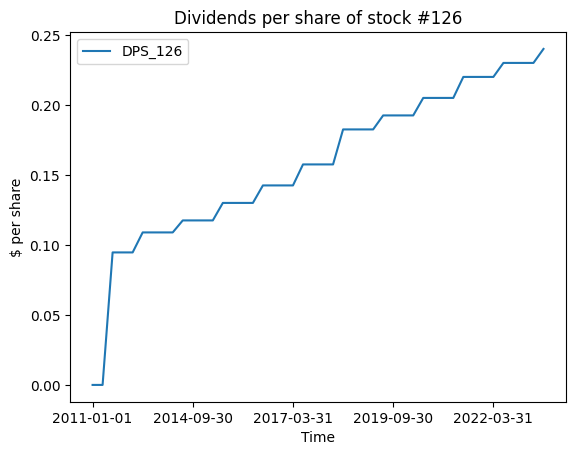

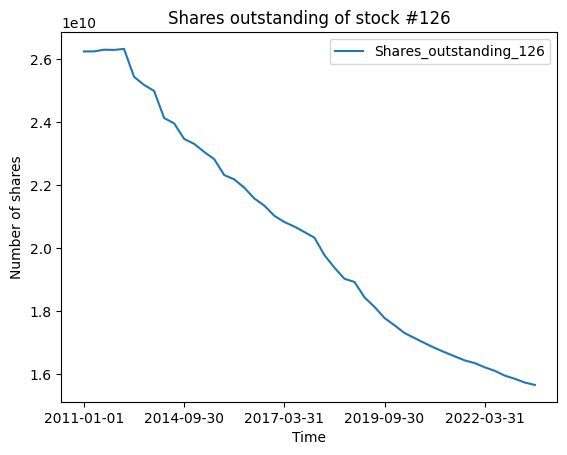

In [58]:
data_qr.plot('Date', 'EPS_126')
plt.xlabel('Time')
plt.ylabel('$ per share')
plt.title('Earnings per share of stock #126')
plt.show()

data_qr.plot('Date', 'DPS_126')
plt.xlabel('Time')
plt.ylabel('$ per share')
plt.title('Dividends per share of stock #126')
plt.show()

data_qr.plot('Date', 'Shares_outstanding_126')
plt.xlabel('Time')
plt.ylabel('Number of shares')
plt.title('Shares outstanding of stock #126')
plt.show()